In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
import shutil
from pprint import pprint

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath
import icewave.gps.gps as gps
import icewave.gps.garmin as garmin

Please install garmin package

/Volumes/


In [7]:
date = '2024_0223'
year,day = date.split('_')

glob.glob(f"/Volumes/Share/Data/{day}/GPS/*")

['/Volumes/Share/Data/0223/GPS/0000_2024-02-23 15_15_23.fit',
 '/Volumes/Share/Data/0223/GPS/0001_2024-02-23 17_16_05.fit',
 '/Volumes/Share/Data/0223/GPS/1000_Waypoints_2024-02-23.gpx']

In [37]:

base = '/Volumes/Share-3/'#Data/0221/GPS/*'
#'Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
folder = base+'Data'+'/'+day+'/GPS/'
norme_folder = base + 'Nomenclature/'

print(glob.glob(base+'*'))
filelist = glob.glob(folder+'*.gpx')
print(filelist)
filegpx = filelist[0]

#base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
#date = '2024_0211'
datesave=date.replace('_','/')
savefolder = folder#base + datesave + '/GPS/' 
print(savefolder)
import gpxpy

gpx_file = open(filegpx, 'r')
gpx = gpxpy.parse(gpx_file)
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

for waypoint in gpx.waypoints:
    print('waypoint {0}, {1} -> ({2},{3})'.format(waypoint.name, waypoint.time.ctime(), waypoint.latitude, waypoint.longitude))

['/Volumes/Share-3/Notebooks', '/Volumes/Share-3/Data', '/Volumes/Share-3/git', '/Volumes/Share-3/Scripts', '/Volumes/Share-3/Stephane', '/Volumes/Share-3/Nomenclature', '/Volumes/Share-3/Biblio', '/Volumes/Share-3/Bestof']
['/Volumes/Share-3/Data/0223/GPS/1000_Waypoints_2024-02-23.gpx']
/Volumes/Share-3/Data/0223/GPS/
waypoint Sag240239, Fri Feb 23 17:25:42 2024 -> (48.329819,-68.850751)
waypoint Sag240240, Fri Feb 23 17:28:09 2024 -> (48.329813,-68.851375)
waypoint Sag240241, Fri Feb 23 17:28:34 2024 -> (48.329819,-68.85139)
waypoint Sag240242, Fri Feb 23 17:30:08 2024 -> (48.32982,-68.851435)
waypoint Sag240243, Fri Feb 23 17:30:57 2024 -> (48.329821,-68.851476)
waypoint Sag240244, Fri Feb 23 17:32:04 2024 -> (48.329823,-68.851509)
waypoint Sag240245, Fri Feb 23 17:34:01 2024 -> (48.329804,-68.851746)
waypoint Sag240246, Fri Feb 23 17:35:34 2024 -> (48.329783,-68.852235)
waypoint Sag240247, Fri Feb 23 17:37:32 2024 -> (48.329767,-68.852564)
waypoint Sag240248, Fri Feb 23 17:44:11 20

In [36]:
gpx

GPX(waypoints=[GPXWaypoint(48.329819, -68.850751, elevation=8.058713, time=datetime.datetime(2024, 2, 23, 17, 25, 42, tzinfo=SimpleTZ("Z")), name='Sag240239', symbol='Flag, Blue'), GPXWaypoint(48.329813, -68.851375, elevation=1.071916, time=datetime.datetime(2024, 2, 23, 17, 28, 9, tzinfo=SimpleTZ("Z")), name='Sag240240', symbol='Flag, Blue'), GPXWaypoint(48.329819, -68.85139, elevation=0.093695, time=datetime.datetime(2024, 2, 23, 17, 28, 34, tzinfo=SimpleTZ("Z")), name='Sag240241', symbol='Flag, Blue'), GPXWaypoint(48.32982, -68.851435, elevation=-3.584218, time=datetime.datetime(2024, 2, 23, 17, 30, 8, tzinfo=SimpleTZ("Z")), name='Sag240242', symbol='Flag, Blue'), GPXWaypoint(48.329821, -68.851476, elevation=-2.893915, time=datetime.datetime(2024, 2, 23, 17, 30, 57, tzinfo=SimpleTZ("Z")), name='Sag240243', symbol='Flag, Blue'), GPXWaypoint(48.329823, -68.851509, elevation=-3.414499, time=datetime.datetime(2024, 2, 23, 17, 32, 4, tzinfo=SimpleTZ("Z")), name='Sag240244', symbol='Flag,

In [30]:
def represent_waypoints(gpx,imin,imax,table=None):
    if table is None:
        table = read_table()
        
    indices = select(gpx,imin,imax)
    Long,Lat = [],[]
    waypoints = np.asarray(gpx.waypoints)[indices]
    for waypoint in waypoints:
        Long.append(waypoint.longitude)
        Lat.append(waypoint.latitude)
        
    print(Long,Lat)

    BBox = gps.box_data(Long,Lat,scale=0.7)
    ext = gps.extent(BBox)
    t = gps.tmp_connect()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    ax,figs = gps.display_map(ext,t,title=date,ax=ax,width=600)

    X,Y = [],[]
    for waypoint in waypoints:
        number = int(waypoint.name[-3:])
        x,y = gps.project(waypoint.longitude,waypoint.latitude)
        X.append(x)
        Y.append(y)
        display(x,y,ax=ax,name=waypoint.name,table=table)
    #savefolder = os.path.dirname(filename)+'/'
    return ax,figs

def represent_table(table,gpx,imin,imax):
    indices = select(gpx,imin,imax)
    Long,Lat = [],[]
    waypoints = np.asarray(gpx.waypoints)[indices]
    for waypoint in waypoints:
        Long.append(waypoint.longitude)
        Lat.append(waypoint.latitude)

    BBox = gps.box_data(Long,Lat,scale=0.7)
    ext = gps.extent(BBox)
    t = gps.tmp_connect()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    ax,figs = gps.display_map(ext,t,title=date,ax=ax,width=600)

    X,Y = [],[]
    numbers = np.asarray([int(waypoint.name[-3:]) for waypoint in gpx.waypoints])
    for (number,elem) in table:
        if number in numbers:
            ind = np.where(np.asarray(numbers)==number)[0][0]
            waypoint = gpx.waypoints[ind]
            x,y = gps.project(waypoint.longitude,waypoint.latitude)
            X.append(x)
            Y.append(y)
            name = elem
            if '_' in elem:
                tag,num = elem.split('_')
                label = norme[tag]
            else:
                label = norme[elem]
            ax.plot(x,y,label)
            
            name = name.replace('_','_{')
            name = '$'+name+'}$'
            plt.text(x,y-10**(-7),name)
    print(filename)
    savefolder = os.path.dirname(filename)+'/'
    return ax,figs
    
def display(x,y,ax=None,name='',table=None):
    if table==None:
        label = 'bo'
    else:
        number = int(name[-3:])
        numbers = [tab[0] for tab in table]
        if number in numbers:
            ind = np.where(np.asarray(numbers)==number)[0][0]
            key,elem = table[ind]
            if '_' in elem:
                name = elem
                tag,num = elem.split('_')
                label = norme[tag]
            else:
                label = norme[elem]
            #print(number,table[number],label)
        elif number>max(numbers):
            label='bo'
        else:
            label='bo'
        ax.plot(x,y,label)
        
    name = name.replace('_','_{')
    name = '$'+name+'}$'
    plt.text(x,y-10**(-7),name)
    

def select(gpx,imin,imax):
    indices = []
    for i,waypoint in enumerate(gpx.waypoints):
        number = int(waypoint.name[-3:])
        #print(number)
        if number>=imin and number<=imax:#True:#int(waypoint.name)>155 and int(waypoint.name)<250:
            indices.append(i)
    return indices

def read_table():
    print(glob.glob(folder+'*.txt'))
    filename = glob.glob(folder+'*.txt')[0]
    with open(filename,'r') as f:
        out = f.read()
    
    lines = out.split('\n')
    table = [line.split('\t') for line in lines]
    dtable = [(int(tab[0]),tab[1]) for tab in table]
    return dtable

def read_norme(folder):
    print(glob.glob(folder+'*.txt'))
    filename = folder+"Nomenclature_GPS.txt"
    
    with open(filename,'r') as f:
        out = f.read()
    
    lines = out.split('\n')
    table = np.asarray([line.split('\t') for line in lines])

    dtable = {tab[0]:tab[1] for tab in table}
    pprint(dtable)
    return dtable

In [31]:
global norme
print(norme_folder)
print(glob.glob(norme_folder+'*.txt'))
norme = read_norme(norme_folder)
table = read_table()

/Volumes/Share-3/Nomenclature/
['/Volumes/Share-3/Nomenclature/Nomenclature_GPS.txt', '/Volumes/Share-3/Nomenclature/Nomenclature_Name_UQAR.txt']
['/Volumes/Share-3/Nomenclature/Nomenclature_GPS.txt', '/Volumes/Share-3/Nomenclature/Nomenclature_Name_UQAR.txt']
{'B': 'mo',
 'Canot': 'yo',
 'D': 'kp',
 'Frac': 'kx',
 'G': 'g^',
 'H': 'bv',
 'Quin': 'gv',
 'R': 'bs',
 'S': 'bo',
 'T': 'rs',
 'Tomo': 'g>',
 'borne': 'ks',
 'depart': 'g*',
 'fin': 'g*',
 'name': 'label',
 'plot': 'rp'}
['/Volumes/Share-3/Data/0223/GPS/Map_Table.txt']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [32]:
print(table)
print(norme)

[(239, 'depart'), (100, 'Canot_01'), (163, 'plot_02'), (164, 'plot_01'), (163, 'G_0414'), (164, 'G_0406'), (165, 'plot_04'), (165, 'G_0416'), (166, 'plot_03'), (166, 'G_0408'), (167, 'borne_00'), (168, 'S_0206'), (169, 'S_0304'), (170, 'S_0305'), (171, 'S_0306'), (172, 'G_0413'), (173, 'G_0404'), (174, 'G_0402'), (175, 'G_0401'), (176, 'G_0405'), (177, 'plot_10'), (178, 'S_0401'), (179, 'S_0402'), (180, 'S_0403'), (181, 'S_0404'), (182, 'S_0405'), (183, 'S_0406'), (184, 'S_0407'), (185, 'S_0408'), (186, 'S_0409'), (187, 'S_0410'), (188, 'S_0411'), (189, 'S_0412'), (190, 'S_0413'), (191, 'S_0414'), (192, 'S_0415'), (193, 'S_0416'), (194, 'S_0417'), (195, 'S_0418'), (196, 'Frac_0101'), (197, 'Frac_0102'), (198, 'Frac_0103'), (199, 'Frac_0104'), (200, 'Frac_0105'), (201, 'Frac_0106'), (202, 'S_0502'), (203, 'S_0503'), (204, 'S_0505'), (205, 'S_0506'), (206, 'S_0507'), (207, 'S_0508'), (208, 'S_0509'), (209, 'S_0510'), (210, 'S_0511'), (211, 'S_0512'), (212, 'S_0513'), (213, 'S_0514'), (21

In [33]:
savefolder

'/Volumes/Share-3/Data/0223/GPS/'

['/Volumes/Share-3/Data/0223/GPS/Map_Table.txt']
[-68.850751, -68.851375, -68.85139, -68.851435, -68.851476, -68.851509, -68.851746, -68.852235, -68.852564, -68.850679, -68.850633, -68.850587, -68.851747, -68.851884, -68.852017, -68.852153, -68.852316, -68.852455, -68.852587, -68.852721, -68.852716, -68.852883, -68.853103, -68.851496, -68.851081, -68.850994, -68.851017, -68.85092, -68.851114, -68.851231, -68.851044, -68.850851, -68.850937, -68.851133, -68.851338, -68.851254, -68.851069, -68.850863, -68.850968, -68.851165, -68.851075, -68.849854] [48.329819, 48.329813, 48.329819, 48.32982, 48.329821, 48.329823, 48.329804, 48.329783, 48.329767, 48.329861, 48.329856, 48.329872, 48.329821, 48.329804, 48.329805, 48.329795, 48.329784, 48.32978, 48.329775, 48.329765, 48.329768, 48.329768, 48.329766, 48.329834, 48.33019, 48.329481, 48.329475, 48.329598, 48.329596, 48.329702, 48.329712, 48.329725, 48.329825, 48.329819, 48.329815, 48.329936, 48.329951, 48.329953, 48.33006, 48.330053, 48.330172, 

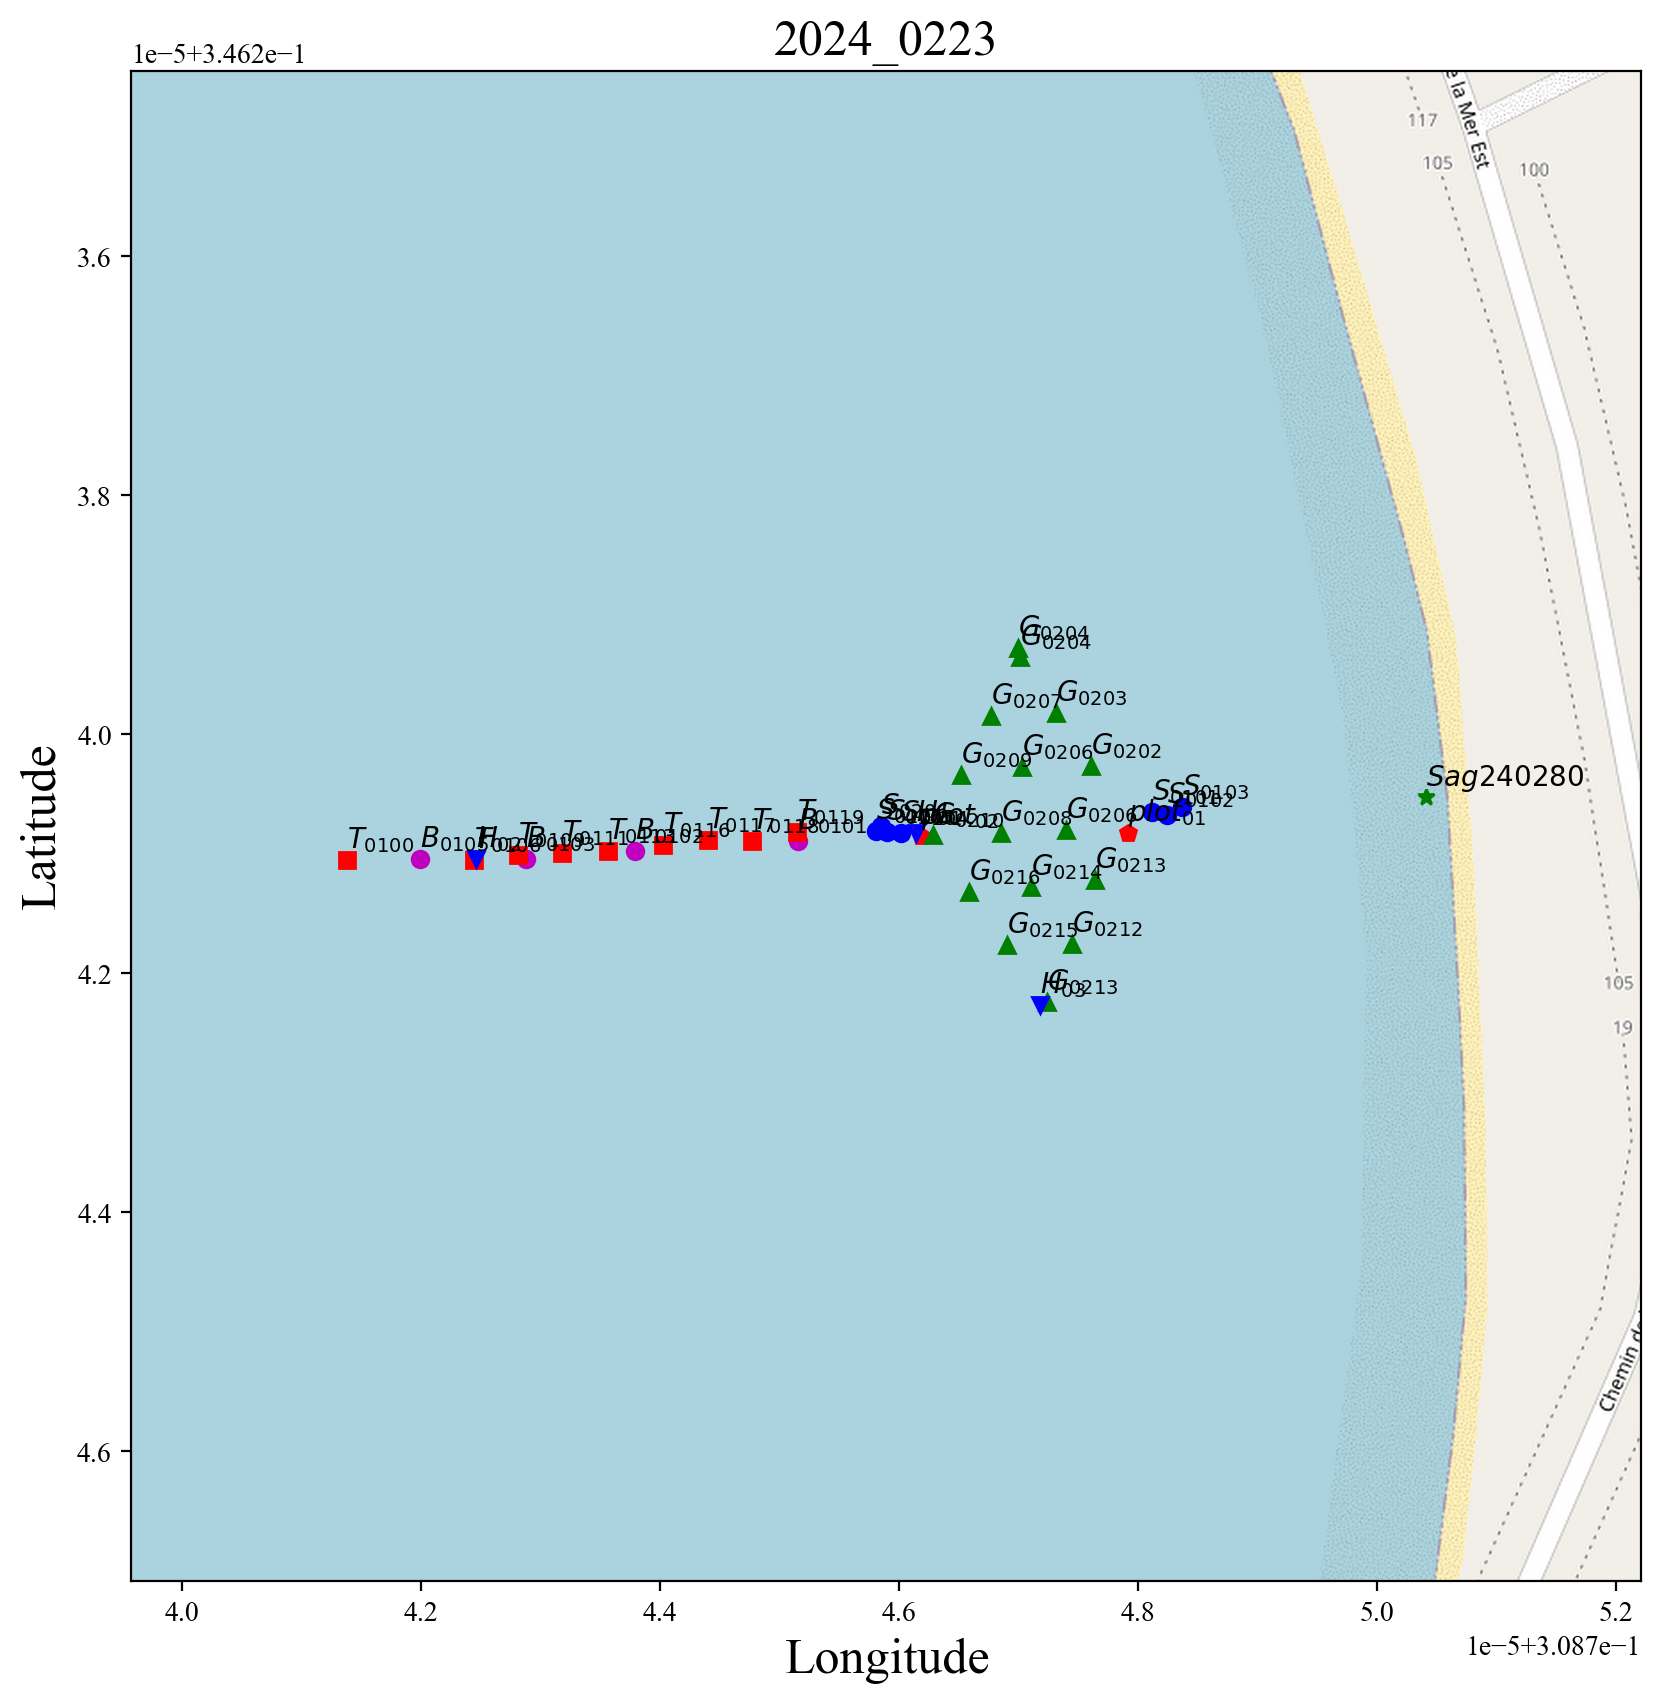

In [61]:
ax,figs = represent_waypoints(gpx,239,280)
print(savefolder)
graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Generale_tout',suffix='labeled',frmt='pdf',overwrite=True)

['/Volumes/Share-1/Data/0221/GPS/Map_Table.txt']
Extent((0.3088613038888889,0.34616311907474084)->(0.30886874333333336,0.3461705585191853) projected as normal)


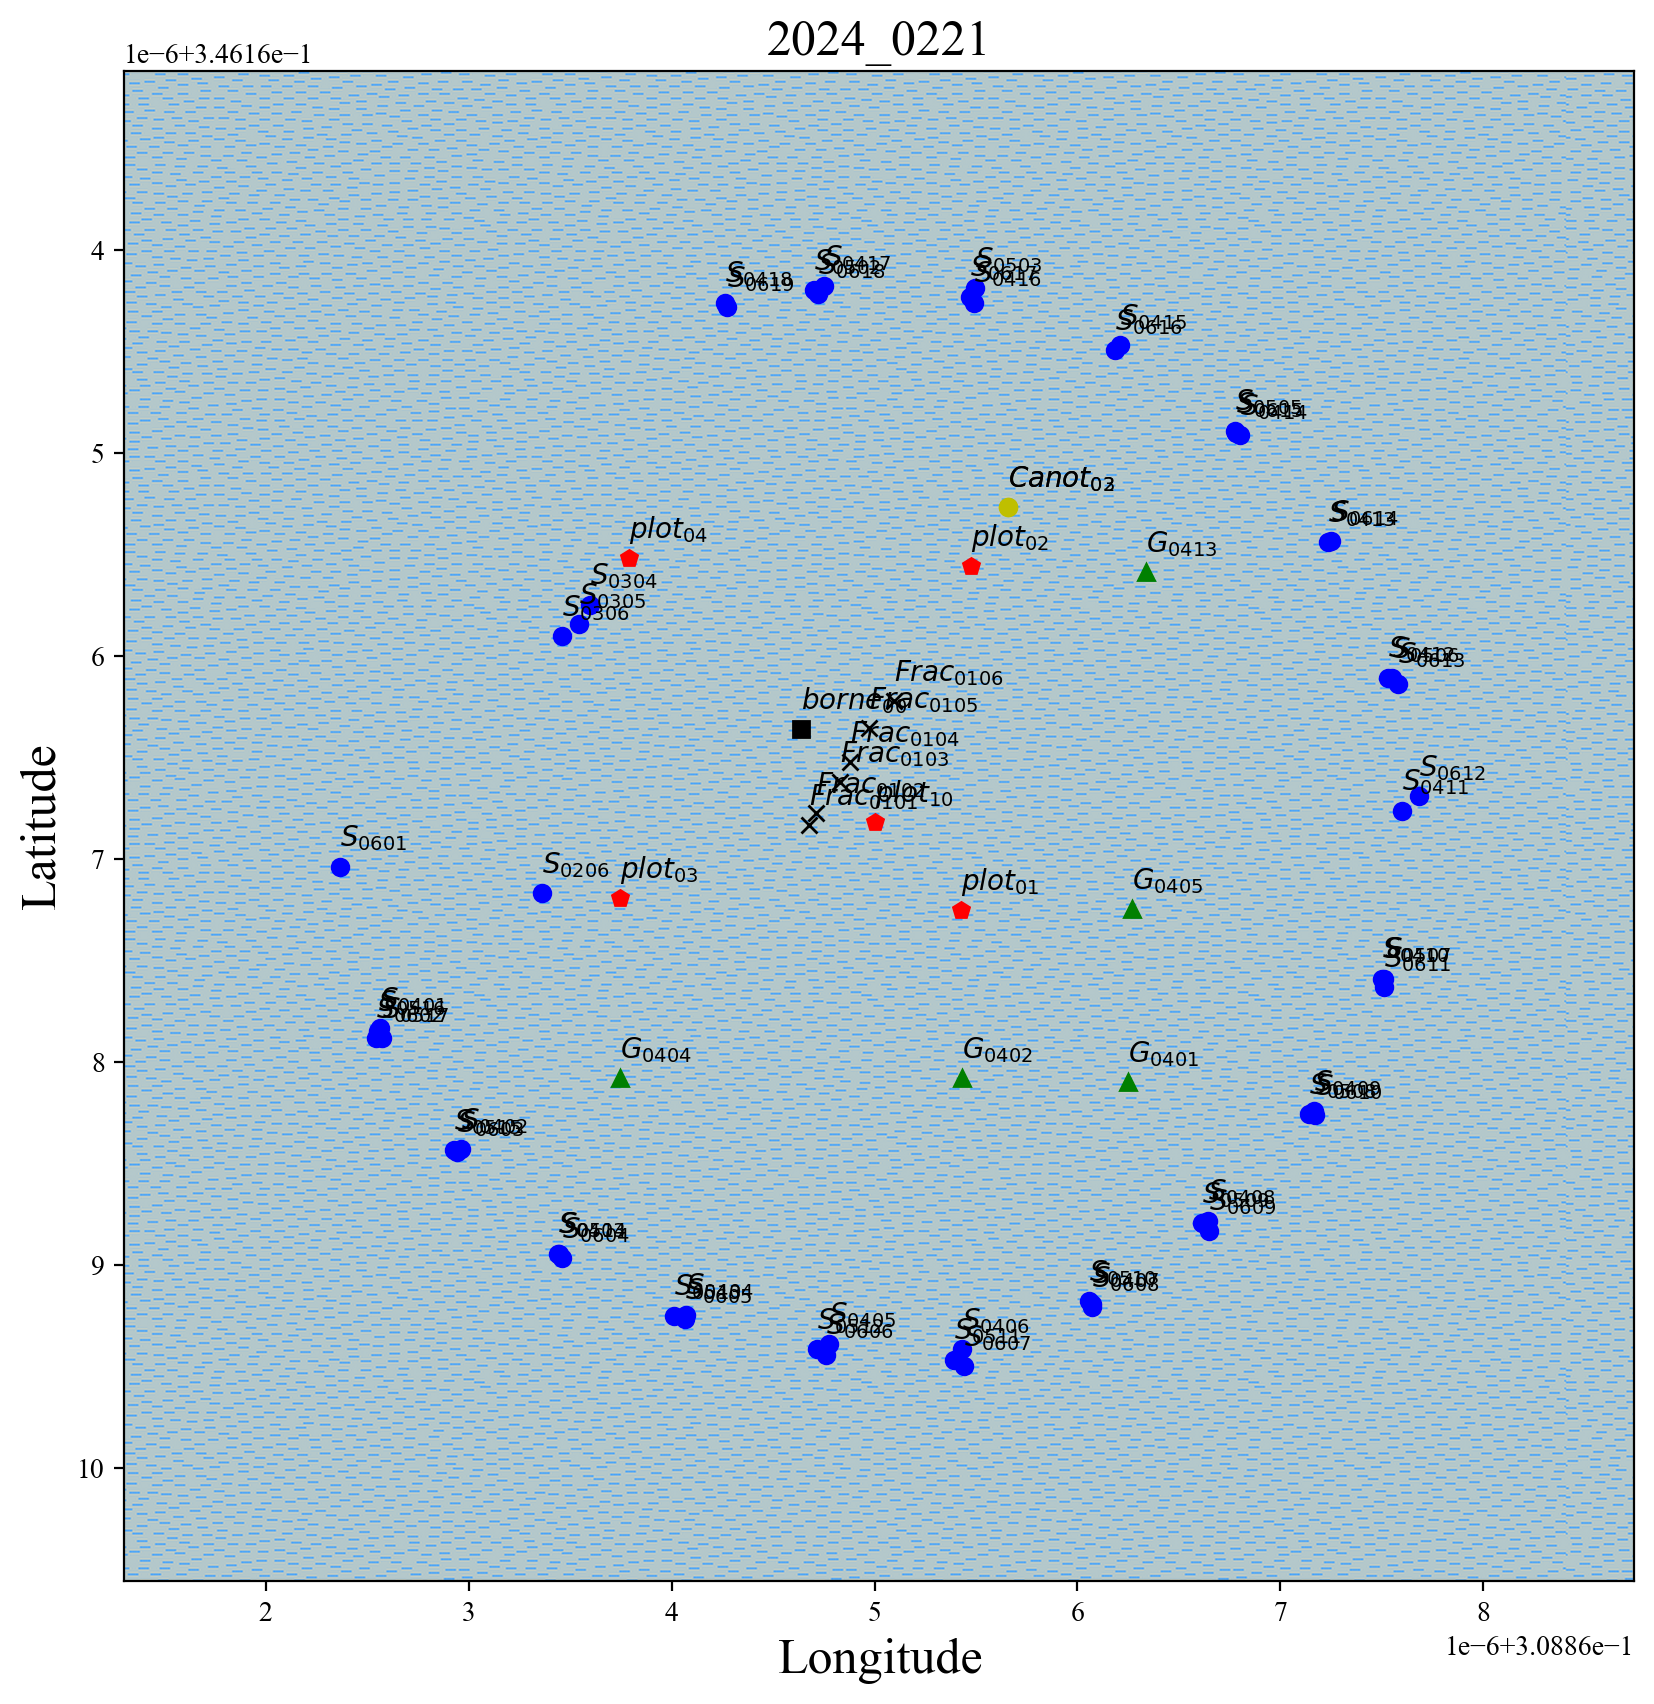

In [37]:
ax,figs = represent_waypoints(gpx,163,237)
graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Generale_focus',suffix='labeled',frmt='pdf',overwrite=True)

In [261]:
gpx.waypoints[0]

GPXWaypoint(48.365506, -70.697383, elevation=1.292548, time=datetime.datetime(2024, 2, 10, 12, 21, 46, tzinfo=SimpleTZ("Z")), name='Sag240063', symbol='Flag, Blue')

In [67]:
import icewave.geometry.display as display

#print(table)
display.read_norme()

['name\tlabel\tsize\tdetail', 'depart\tg*\t20\tdepart', 'fin\tg*\t20\tfin', 'G\tg>\t10\tGeophone', 'B\tmo\t12\tBuoy', 'T\trs\t10\tTelephone', 'D\tkp\t16\tDrone', 'H\tbv\t10\tHauteur', 'S\tbo\t12\tSource', 'Tomo\tg>\t10\tTomographie', 'borne\tks\t20\tborne', 'plot\trp\t20\tplot', 'R\tbs\t24\tROV', 'Canot\tyo\t30\tCanot']


{'depart': {'name': 'depart', 'label': 'g*', 'size': '20', 'detail': 'depart'},
 'fin': {'name': 'fin', 'label': 'g*', 'size': '20', 'detail': 'fin'},
 'G': {'name': 'G', 'label': 'g>', 'size': '10', 'detail': 'Geophone'},
 'B': {'name': 'B', 'label': 'mo', 'size': '12', 'detail': 'Buoy'},
 'T': {'name': 'T', 'label': 'rs', 'size': '10', 'detail': 'Telephone'},
 'D': {'name': 'D', 'label': 'kp', 'size': '16', 'detail': 'Drone'},
 'H': {'name': 'H', 'label': 'bv', 'size': '10', 'detail': 'Hauteur'},
 'S': {'name': 'S', 'label': 'bo', 'size': '12', 'detail': 'Source'},
 'Tomo': {'name': 'Tomo',
  'label': 'g>',
  'size': '10',
  'detail': 'Tomographie'},
 'borne': {'name': 'borne', 'label': 'ks', 'size': '20', 'detail': 'borne'},
 'plot': {'name': 'plot', 'label': 'rp', 'size': '20', 'detail': 'plot'},
 'R': {'name': 'R', 'label': 'bs', 'size': '24', 'detail': 'ROV'},
 'Canot': {'name': 'Canot', 'label': 'yo', 'size': '30', 'detail': 'Canot'}}

In [81]:
savefolder

'/Volumes/Share-3/Data/0223/GPS/'

[['#', 'X', 'Y', 'Z'], ['G_201', 0, 0, 0], ['G_202', 15, 0, 0], ['G_203', 30, 0, 0], ['G_204', 45, 0, 0], ['G_205', 7.5, -13, 0], ['G_206', 22.5, -13, 0], ['G_207', 37.5, -13, 0], ['G_208', 15, -26, 0], ['G_209', 30, -26, 0], ['G_210', 22.5, -39, 0], ['G_205', 7.5, 13, 0], ['G_206', 22.5, 13, 0], ['G_207', 37.5, 13, 0], ['G_208', 15, 26, 0], ['G_209', 30, 26, 0], ['G_210', 22.5, 39, 0]]


(-19.3, 163.3, -42.9, 42.9)

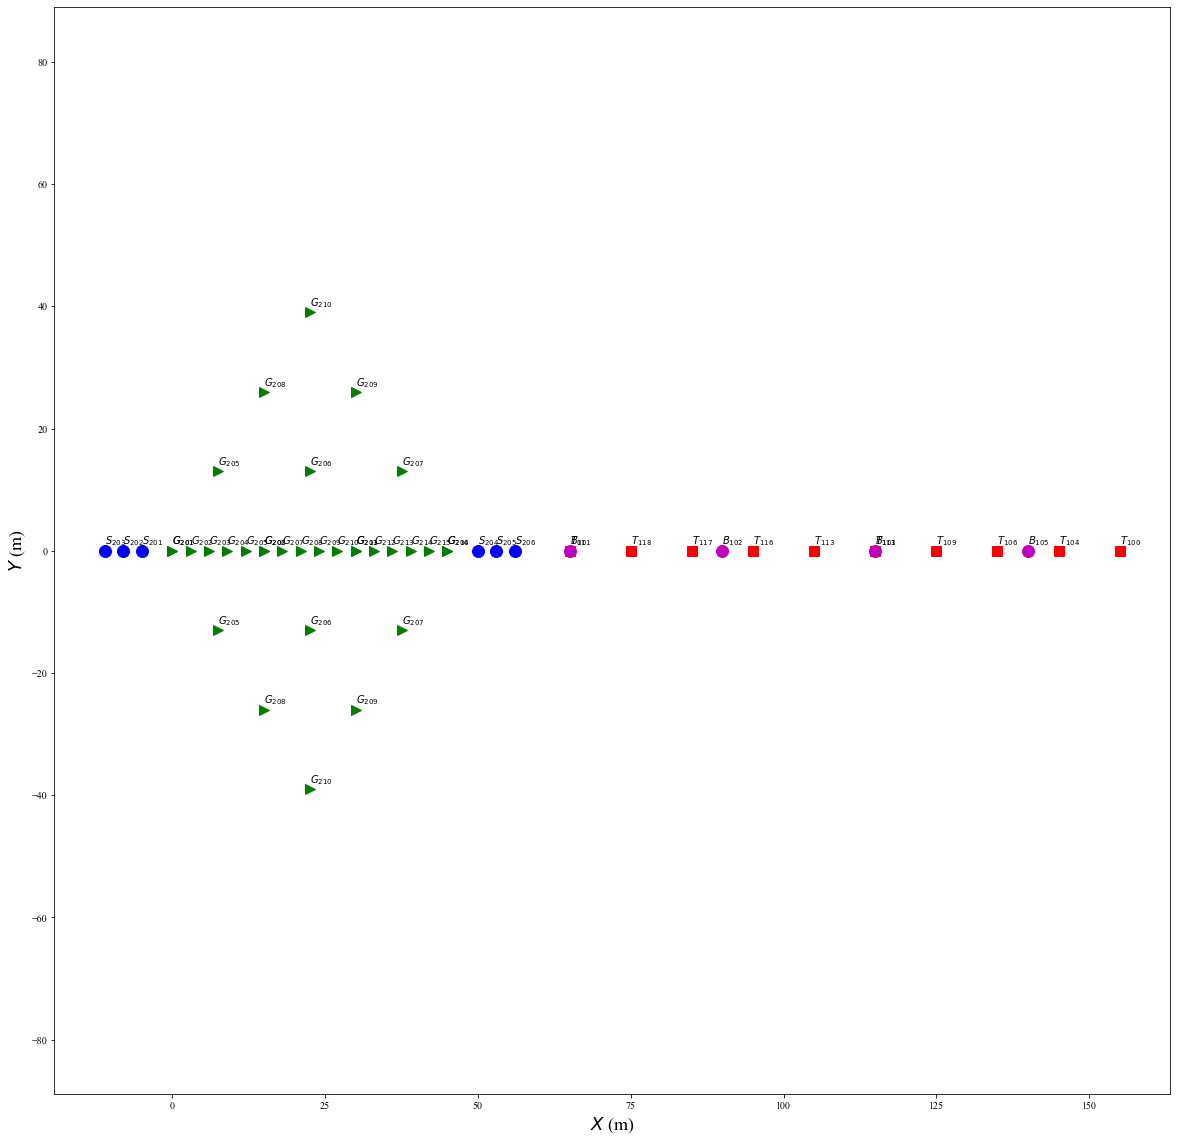

In [82]:
import icewave.geometry.experiment_2024_0223 as experiment


figs,geom = experiment.Sag24()
graphes.save_figs(figs,savedir=savefolder,prefix='geometry_'+date,suffix='_general',overwrite=True)
#print(figs)
plt.axis('equal')

In [83]:
geom

[['#', 'X', 'Y', 'Z'],
 ['G_201', 0, 0, 0],
 ['G_202', 3, 0, 0],
 ['G_203', 6, 0, 0],
 ['G_204', 9, 0, 0],
 ['G_205', 12, 0, 0],
 ['G_206', 15, 0, 0],
 ['G_207', 18, 0, 0],
 ['G_208', 21, 0, 0],
 ['G_209', 24, 0, 0],
 ['G_210', 27, 0, 0],
 ['G_211', 30, 0, 0],
 ['G_212', 33, 0, 0],
 ['G_213', 36, 0, 0],
 ['G_214', 39, 0, 0],
 ['G_215', 42, 0, 0],
 ['G_216', 45, 0, 0],
 ['S_201', -5, 0, 0],
 ['S_202', -8, 0, 0],
 ['S_203', -11, 0, 0],
 ['S_204', 50, 0, 0],
 ['S_205', 53, 0, 0],
 ['S_206', 56, 0, 0],
 ['T_01', 65, 0, 0],
 ['T_118', 75, 0, 0],
 ['T_117', 85, 0, 0],
 ['T_116', 95, 0, 0],
 ['T_113', 105, 0, 0],
 ['T_111', 115, 0, 0],
 ['T_109', 125, 0, 0],
 ['T_106', 135, 0, 0],
 ['T_104', 145, 0, 0],
 ['T_100', 155, 0, 0],
 ['B_101', 65, 0, 0],
 ['B_102', 90, 0, 0],
 ['B_103', 115, 0, 0],
 ['B_105', 140, 0, 0],
 ['G_201', 0, 0, 0],
 ['G_202', 15, 0, 0],
 ['G_203', 30, 0, 0],
 ['G_204', 45, 0, 0],
 ['G_205', 7.5, -13, 0],
 ['G_206', 22.5, -13, 0],
 ['G_207', 37.5, -13, 0],
 ['G_208', 15, -2

In [84]:
import icewave.geometry.save as geom_save

filename = savefolder + f"Geom_table_{day}.txt"

#pprint(geom)

geom_save.save(geom,filename)

In [85]:
savefolder

'/Volumes/Share-3/Data/0223/GPS/'